# DCT

Transformada discreta de cosseno (DCT, *Discrete Cosine Transform*).

## Transformadas Ortogonais de Comprimento Finito

Equação de análise:

$ A[k] = \sum_{n=0}^{N-1} x[n] \phi^{\ast}_{k} [n] $

Equação de síntese:

$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} A[k] \phi_k[n] $

As sequências $\phi_k [n]$ são chamadas de *sequências de base* e são ortogonais entre si, i.e.

$ \langle \phi_k , \phi_m \rangle = \frac{1}{N} \sum_{n=0}^{N-1} \phi_k [n] \phi^{\ast}_m [n] = \begin{cases} 1, \quad m=k \\ 0, \quad m \neq k .\end{cases} = \delta_{m,k}.$

## DCT

* As sequências de base $\phi_k$ são cossenos. 
* Cossenos são funções periódicas com simetria par.
* A extensão de $x[n]$ fora do intervalo $0 \leq n \leq (N-1)$ na equação

  $ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} A[k] \phi_k[n] $
  
  será periódica e com simetria par.
* sequência finita $\rightarrow$ sequência periódica
* sequência periódica $\rightarrow$ sequência finita
*  Existem 8 formas diferentes de fazer a extensão periódica de uma sequência. (borda esquerda/direita; simetria par/ímpar; ponto dos dados/ponto intermediário)

### DCT-II
A DCT-II é definida pelo par de transformada:

$ X^{C2}[k] = 2 \sum_{n=0}^{N-1} x[n] \cos \left( \frac{\pi k (2n+1)}{2N} \right), \quad 0 \leq k \leq N-1 , $

$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} \beta[k] X^{C2}[k] \cos \left( \frac{\pi k (2n+1)}{2N} \right), \quad 0 \leq n  \leq N-1 , $

onde a função de peso $\beta[k]$ é dada por

$ \beta[k] = \begin{cases} \frac{1}{2} , \quad k = 0 \\ 1 , \quad 1 \leq k \leq N - 1 . \end{cases} $


Muitas vezes inclui-se um fator de normalização para tornar a transformada unitária. Nesse caso as equações ficam na seguinte forma:

$ \tilde{X}^{C2}[k] = \sqrt{\frac{2}{N}} \tilde{\beta}[k] \sum_{n=0}^{N-1} x[n] \cos \left( \frac{\pi k (2n+1)}{2N} \right), \quad 0 \leq k \leq N-1 , $

$ x[n] = \sqrt{\frac{2}{N}} \sum_{k=0}^{N-1} \tilde{\beta}[k] \tilde{X}^{C2}[k] \cos \left( \frac{\pi k (2n+1)}{2N} \right), \quad 0 \leq n \leq N-1 , $

onde a função de peso $\tilde{\beta}[k]$ é dada por

$ \tilde{\beta}[k] = \begin{cases} \frac{1}{\sqrt{2}} , \quad k = 0 \\ 1 , \quad 1 \leq k \leq N - 1 . \end{cases} $

#### Forma Matricial

$ \tilde{X}^{C2}[k] = \sqrt{\frac{2}{N}} \tilde{\beta}[k] \sum_{n=0}^{N-1} x[n] \cos \left( \frac{\pi k (2n+1)}{2N} \right) $

$ \tilde{X}^{C2}[k] = \sum_{n=0}^{N-1} x[n]  \sqrt{\frac{2}{N}}  \tilde{\beta}[k] \cos \left( \frac{\pi k (2n+1)}{2N} \right) $

$ \tilde{X}^{C2}[k] = \sum_{n=0}^{N-1} x[n] c[k,n] $

onde 

$ c[k,n] \triangleq \sqrt{\frac{2}{N}}  \tilde{\beta}[k] \cos \left( \frac{\pi k (2n+1)}{2N} \right) \quad  k,n = 0,1,\ldots,N-1 $


A DCT sobre $x[n] = {\bf x}$ pode ser expressa na forma matricial
$ {\bf X}={\bf C}^T {\bf x} $


### GNU Octave

No Octave e Matlab, a função *dct* implementa a DCT-II definida acima. No GNU Octave a função faz parte do pacote *signal*.

In [2]:
pkg load signal
help dct

'dct' is a function from the file /usr/share/octave/packages/signal-1.4.0/dct.m

 -- Function File: dct (X)
 -- Function File: dct (X, N)
     Compute the discrete cosine transform of X.  If N is given, then X
     is padded or trimmed to length N before computing the transform.
     If X is a matrix, compute the transform along the columns of the
     the matrix.  The transform is faster if X is real-valued and has
     even length.

     The discrete cosine transform X can be defined as follows:

                        N-1
            X[k] = w(k) sum x[n] cos (pi (2n+1) k / 2N ),  k = 0, ..., N-1
                        n=0

     with w(0) = sqrt(1/N) and w(k) = sqrt(2/N), k = 1, ..., N-1.  There
     are other definitions with different scaling of X[k], but this form
     is common in image processing.

     See also: idct, dct2, idct2, dctmtx.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to s

## Compactação de Energia

Um dos motivos pelo qual a DCT é usualmente empregada em compressão de sinais é devido à sua propriedade de compactação de energia, ou seja, poucos coeficientes concentram a maior parte da energia do sinal.

Veremos aqui a implementação em GNU Octave do Exemplo 8.13 do livro *Discrete-Time Signal Processing* de  Oppenheim e Schafer. Leia o exemplo no livro.

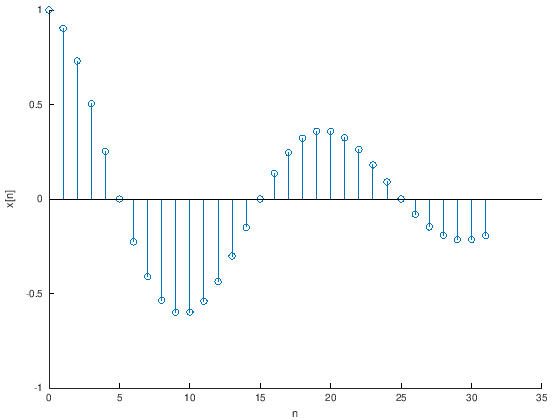

In [4]:
N=32; n=[0:N-1];
w0=0.1*pi; a=0.95; phi=0; x=a.^n .* cos(w0*n+phi);
figure; stem(n,x); xlabel('n'); ylabel('x[n]');

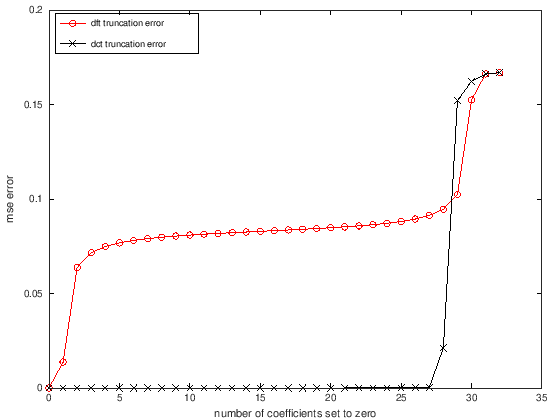

In [5]:
Xdft=fft(x);
Xdct=dct(x);
function e=mse(x,y), e=sum(abs(x-y).^2)/length(x); endfunction
edft=[];edct=[]; 
for k=0:N, 
        edft(k+1)=mse(x,ifft([Xdft(1:N-k) zeros(1,k)])); 
        edct(k+1)=mse(x,idct([Xdct(1:N-k) zeros(1,k)])); 
endfor;
figure; plot(0:N,edft,'-ro',0:N,edct,'-kx');
xlabel('number of coefficients set to zero'); ylabel('mse error');
legend('dft truncation error','dct truncation error','location','northwest');

### DCT 2D

Considere uma imagem $N \times N$, $\mathbf{A}$. A 2D-DCT de $\mathbf{A}$ é dada por $\mathbf{Y} = \mathbf{C} \mathbf{X} \mathbf{C}^T$, e a inversa é $\mathbf{X} = \mathbf{C}^T \mathbf{X} \mathbf{C}$.

Veremos abaixo os elementos de base da DCT em duas dimensões para matrizes $8 \times 8$.

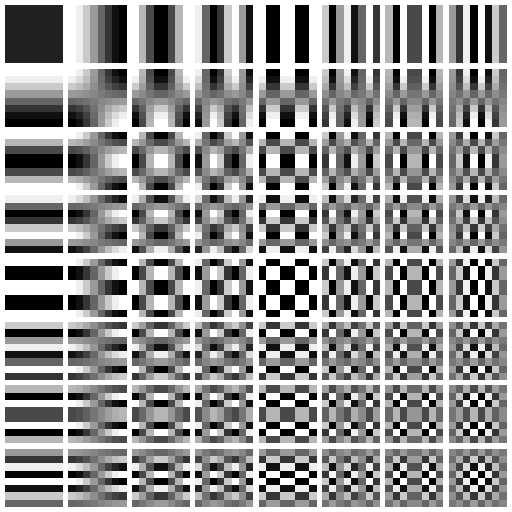

In [6]:
N = 8;
M = N*1.1; delta=(1-N/M)/(N+1);
function x = normalize(x), xmin=min(min(x)); xmax=max(max(x)); if xmax != xmin, x=(x-xmin)./(xmax-xmin); else, x=abs(x); endif; endfunction;

figure('position',[0,0,512,512]); set(gcf,'Color',[1,0,0]);
for i=1:N, for j=1:N,
        D=zeros(N); D(i,j)=1;
        d=idct2(D);
        axes('Position',[(j-1)/M+j*delta (1-1/M)-(i-1)/M-i*delta 1/M 1/M]);
        d=255*normalize(d);
        imshow(uint8(d));
end; end;

### Exemplo Lena 64x64

Vamos mostrar agora a aplicação da DCT em um blocos $8 \times 8$ da imagem Lena.

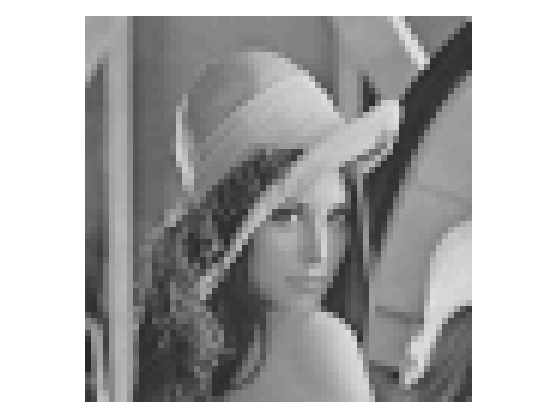

In [8]:
Xlena = imread('imgs/lena_64x64.png');
imshow(Xlena);

Xdct =

 Columns 1 through 5:

   1255.6250000     31.0394905    -32.4379119     51.0812118    -37.1250000
      6.8071257     -8.0709265    -14.4246225     -5.0910477      1.8504619
     -8.1051681     -9.3842264     19.4575532     18.0434156     -9.0522613
      7.8256527      5.7859934     -3.7495008    -10.6330484     -3.3567800
     -0.3750000     -1.8694322      2.1531776      3.3467895      4.3750000
      0.6974792      0.9221199      1.3359949     -3.2157920     -1.5170412
     -0.2958031     -0.2831511      0.4633883      1.8082260      1.9906821
      1.1172387      0.0426861     -0.0028931     -1.7662679      0.2624976

 Columns 6 through 8:

     10.5916183    -15.9236654     11.0912107
      9.2766755      4.4954901     -3.7450033
     -7.5688026     -0.2866117      0.3217898
      7.9965186      3.2747607     -1.1469936
      0.6706197     -4.2743510     -1.3386533
     -0.4579419      0.1367442      1.2755858
     -0.0237670      0.5424468      0.0755361
     -0.3661740

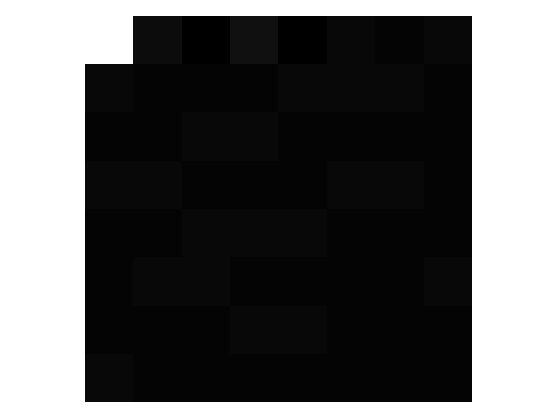

In [11]:
X = double(Xlena(1:8,1:8));
Xdct = dct2(X);
Xdct
imshow(uint8(255*normalize(Xdct)));

Na figura acima podemos observar a DCT de um bloco da imagem. No canto superior esquerdo temos o coeficiente DC, com maior energia, e os demais 63 coeficientes AC. Ao se afastar da coeficiente DC temos coeficientes AC com frequências cada vez maiores. (Para melhor visualização normalizamos a matriz).


Note que se arrendondarmos os valores da matriz de DCT, praticamente podemos reconstruir a matriz original. Veja a diferença entre elas.

In [21]:
X - idct2(round(Xdct))

ans =

 Columns 1 through 6:

  -0.1782350  -0.4007821  -0.2993914  -0.5651648  -0.0836608  -0.0984394
  -0.2163820  -0.3204915   0.6718151   0.2946797  -0.0353255   0.4210558
  -0.2726736  -0.0814075   0.2877068  -0.0390029   0.3369108  -0.2839082
  -0.2160531   0.0537223  -0.0271334   0.0914437   0.1705260  -0.1231751
  -0.0051549   0.2562498  -0.1747950   0.0197447   0.2793300   0.5209160
  -0.3087461   0.1307759  -0.0297145  -0.2110225  -0.3163233   0.1060821
   0.0655057   0.0010856   0.0994756  -0.2562011   0.3087907   0.0055755
  -0.0445371   0.2929228  -0.5282674   0.0367394   0.0302308  -0.3743380

 Columns 7 and 8:

  -0.0648800  -0.0348208
   0.2016244  -0.5386067
  -0.1825352   0.0500201
  -0.7300480  -0.1063577
  -0.5515657  -0.3626568
   0.2073227  -0.0526222
  -0.2344626   0.1909988
   0.2490047  -0.0313735



A seguir iremos selecionar os $P$ coeficientes mais significativos (maior energia) da DCT da imagem e iremos mostrar os elementos de base associados a ele e a soma desses $P$ elementos. Note como poucos coeficientes são capazes de aproximar o bloco original.

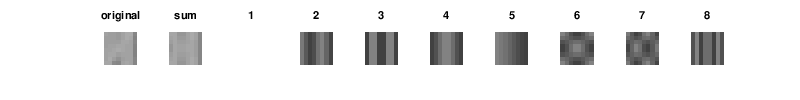

In [22]:
P=8; % number of largest values to select
[~, sortIndex] = sort(abs(Xdct(:)), 'descend');
hf = figure('Position',[0 0 800 100]);
subplot(1,P+2,1); imshow(uint8(X)); title('original');
S = zeros(size(Xdct));
for p=1:P,
  Xdct2 = zeros(size(Xdct));
  Xdct2(sortIndex(p)) = Xdct(sortIndex(p));
  X2 = idct2(Xdct2);
  S += X2;
  subplot(1,P+2,p+2); imshow(uint8(64+64*normalize(X2))); title(num2str(p));
  subplot(1,P+2,2); imshow(uint8(S)); title('sum');
endfor

Usualmente usamos blocos pequenos e realizamos a DCT em cada um desses blocos. A título de ilustração, vamos utilizar novamente a imagem da Lena $64 \times 64$ e faremos a DCT da imagem toda, como um único bloco de tamanho $64 \times 64$. A animação abaixo ilustra a soma dos $64$ elementos de base associados aos $64$ coeficientes de maior energia.

![](imgs/lena_dct.gif)

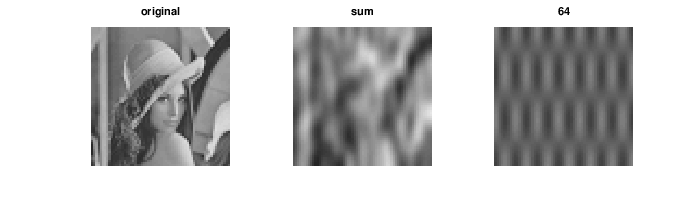

In [23]:
X = double(Xlena);
Xdct = dct2(X);
P=64; % number of largest values to select
[~, sortIndex] = sort(abs(Xdct(:)), 'descend');
hf = figure('Position',[0 0 700 200]);
subplot(1,3,1); imshow(uint8(X)); title('original');
S = zeros(size(Xdct));
for p=1:P,
  Xdct2 = zeros(size(Xdct));
  Xdct2(sortIndex(p)) = Xdct(sortIndex(p));
  X2 = idct2(Xdct2);
  S += X2;
  subplot(1,3,3); imshow(uint8(64+64*normalize(X2))); title(num2str(p));
  subplot(1,3,2); imshow(uint8(S)); title('sum');
  pause(0.2);
endfor

### JPEG

A seguir ilustramos a principal parte do processo de compressão JPEG. Para simplificar iremos realizar o processo com uma imagem em tons de cinza.

Iremos aplicar a DCT-II 2D em blocos $8 \times 8$ de uma imagem. O resultado da DCT será quantizado, utilizando a matriz de quantização padrão do JPEG. Após realizar a quantização, faremos a reconstrução do sinal. Por fim, comparamos lado a lado a imagem original e a imagem após esse processo de compressão.

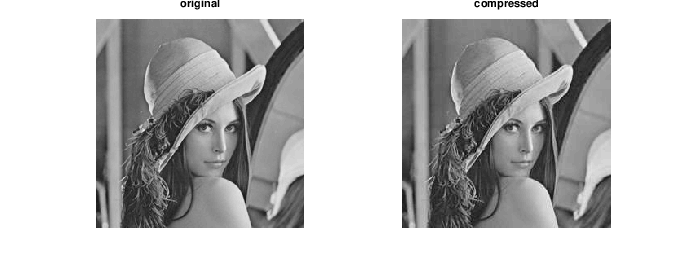

In [26]:
pkg load image
X = double(rgb2gray(imread('imgs/lena.png')));
T = dctmtx(8);
dct = @(block_struct) T * block_struct * T';
B = blockproc(X,[8 8],dct);
quality = 1;
m = [16 11 10 16 24 40 51 61        % default JPEG normalizing array
     12 12 14 19 26 58 60 55        % and zig-zag reordering pattern
     14 13 16 24 40 57 69 56
     14 17 22 29 51 87 80 62
     18 22 37 56 68 109 103 77
     24 35 55 64 81 104 113 92
     49 64 78 87 103 121 120 101
     72 92 95 98 112 100 103 99] * quality;
Y = blockproc(B, [8 8], @(block_struct) round(block_struct./m));
Yr = blockproc(Y, [8 8], @(block_struct) block_struct.*m);
idct = @(block_struct) T' * block_struct * T;
Xr = blockproc(Yr,[8 8],idct);
figure("position",get(0,"screensize")./[1 1 2 3]);
subplot(1,2,1); imshow(uint8(X)); title('original');
subplot(1,2,2); imshow(uint8(Xr)); title('compressed');